In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:



downloaded = drive.CreateFile({'id':'1H3Dpt2nkyFhpap7CuATl_YGi2dXJFS7z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tv.csv')

downloaded = drive.CreateFile({'id':'1sn8YS229HGrSo_88xXwjtHjeMJJZTm8M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [4]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,38.88481,-77.00609,2015,1,1,0.00,2.62,71.46,101.16,9.12,5.11,-4.02,-4.87,-0.39,3.70
1,38.88481,-77.00609,2015,1,2,0.00,3.16,73.91,101.57,7.84,6.07,-1.76,-2.33,1.79,4.81
2,38.88481,-77.00609,2015,1,3,4.49,4.18,96.42,101.75,5.26,4.38,-0.87,1.35,2.02,1.49
3,38.88481,-77.00609,2015,1,4,10.86,7.35,98.24,100.28,11.12,14.93,3.81,8.88,9.66,6.29
4,38.88481,-77.00609,2015,1,5,0.00,2.34,61.61,101.63,9.17,5.02,-4.14,-6.45,0.15,7.72


In [5]:
#imporing capitalbikeshare-tripdata dataset
df = pd.read_csv("tv.csv") 
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223.0,22.0,8.0,2020.0
1,1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287.0,26.0,8.0,2020.0
2,2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338.0,7.0,8.0,2020.0
3,3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833.0,7.0,8.0,2020.0
4,4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513.0,18.0,8.0,2020.0


In [51]:
s1 = df.query('start_station_id == 31131')
s1 = s1.sort_values(by=['DY'])
s1

,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
39247076,39247076,5353FF6B298080A3,docked_bike,2020-10-01 08:22:30,31131.0,1007.0,1.0,10.0,2020.0
5649483,5649483,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0
18526263,18526263,F1255779A5D65C31,docked_bike,2020-09-01 22:55:45,31131.0,236.0,1.0,9.0,2020.0
42831679,42831679,BFF20119F0FCEBB9,docked_bike,2020-10-01 07:42:00,31131.0,592.0,1.0,10.0,2020.0
8973844,8973844,88AEB2387543B67B,electric_bike,2020-08-01 18:36:31,31131.0,517.0,1.0,8.0,2020.0
...,...,...,...,...,...,...,...,...,...
43994370,43994370,3352CFAEFC8ACD69,docked_bike,2020-10-31 16:29:27,31131.0,1098.0,31.0,10.0,2020.0
40215232,40215232,0EC08F98DCFEE551,docked_bike,2020-10-31 22:57:50,31131.0,822.0,31.0,10.0,2020.0
7277382,7277382,AD4CA8A69A35D4B7,docked_bike,2020-08-31 10:53:13,31131.0,1545.0,31.0,8.0,2020.0
8542878,8542878,26EDA0FBF42675CC,electric_bike,2020-08-31 05:42:19,31131.0,646.0,31.0,8.0,2020.0


In [7]:
result = pd.merge(s1, temp, how='left', on=['DY', 'MO','YEAR'])
result


,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,39247076,5353FF6B298080A3,docked_bike,2020-10-01 08:22:30,31131.0,1007.0,1.0,10.0,2020.0,38.88481,-77.00609,7.64,9.23,80.90,100.35,10.66,21.91,11.24,12.84,16.09,4.20
1,5649483,E43D340103773E59,docked_bike,2020-08-01 21:42:15,31131.0,2295.0,1.0,8.0,2020.0,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
2,18526263,F1255779A5D65C31,docked_bike,2020-09-01 22:55:45,31131.0,236.0,1.0,9.0,2020.0,38.88481,-77.00609,5.66,15.29,90.53,100.68,7.61,26.50,18.89,20.75,22.39,2.11
3,42831679,BFF20119F0FCEBB9,docked_bike,2020-10-01 07:42:00,31131.0,592.0,1.0,10.0,2020.0,38.88481,-77.00609,7.64,9.23,80.90,100.35,10.66,21.91,11.24,12.84,16.09,4.20
4,8973844,88AEB2387543B67B,electric_bike,2020-08-01 18:36:31,31131.0,517.0,1.0,8.0,2020.0,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,43994370,3352CFAEFC8ACD69,docked_bike,2020-10-31 16:29:27,31131.0,1098.0,31.0,10.0,2020.0,38.88481,-77.00609,0.10,4.79,78.20,102.02,7.43,11.22,3.80,3.46,6.98,4.63
801,40215232,0EC08F98DCFEE551,docked_bike,2020-10-31 22:57:50,31131.0,822.0,31.0,10.0,2020.0,38.88481,-77.00609,0.10,4.79,78.20,102.02,7.43,11.22,3.80,3.46,6.98,4.63
802,7277382,AD4CA8A69A35D4B7,docked_bike,2020-08-31 10:53:13,31131.0,1545.0,31.0,8.0,2020.0,38.88481,-77.00609,15.91,13.03,85.73,100.63,5.06,23.49,18.43,18.21,20.68,3.01
803,8542878,26EDA0FBF42675CC,electric_bike,2020-08-31 05:42:19,31131.0,646.0,31.0,8.0,2020.0,38.88481,-77.00609,15.91,13.03,85.73,100.63,5.06,23.49,18.43,18.21,20.68,3.01


In [8]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [9]:
s4 = temp.query('YEAR == 2020 and MO == 4')
s4 = s4.sort_values(by=['MO'])
s4.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
1917,38.88481,-77.00609,2020,4,1,0.68,5.14,76.67,100.00,8.51,12.53,4.01,4.20,8.02,3.69
1944,38.88481,-77.00609,2020,4,28,0.55,6.28,77.54,101.10,9.14,15.40,6.25,7.22,10.96,4.05
1943,38.88481,-77.00609,2020,4,27,1.12,5.39,72.23,100.64,9.56,15.10,5.54,4.97,9.68,4.03
1942,38.88481,-77.00609,2020,4,26,11.27,7.75,90.66,99.82,6.22,14.69,8.47,10.09,11.59,5.19
1941,38.88481,-77.00609,2020,4,25,3.82,7.28,83.55,100.59,8.58,16.52,7.94,9.30,11.99,4.42


In [10]:
sa =result.groupby(["rideable_type","DY","MO","RH2M","PS","T2M_RANGE","T2M_MAX","T2M_MIN"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
modified['docked_b'] = s5
modified['electric_b'] = s6
modified

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 6, 3, 7, 2, 5, 3, 4, 8, 1, 11, 10, 7, 24, 7, 5, 12, 9, 5, 6, 3, 10, 4, 6, 9, 8, 2, 11, 8, 4, 9, 6, 6, 6, 4, 1, 7, 5, 18, 3, 5, 4, 10, 2, 11, 6, 2, 7, 4, 5, 7, 3, 4, 6, 5, 5, 5, 6, 8, 3]
[7, 6, 6, 5, 5, 3, 3, 5, 8, 2, 4, 2, 8, 9, 3, 3, 6, 11, 3, 7, 7, 6, 5, 6, 2, 5, 3, 1, 6, 7, 7, 3, 6, 7, 5, 4, 11, 3, 7, 8, 5, 4, 4, 5, 3, 3, 5, 1, 1, 8, 4, 6, 5, 6, 11, 3, 1, 8, 2, 3, 1, 9, 6, 5, 5, 3, 6, 3, 4, 6, 1, 4, 4, 6, 3, 4, 9, 3, 2, 1, 5, 2, 3, 2, 8, 7, 5, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


,rideable_type,DY,MO,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,count,docked_b,electric_b
0,docked_bike,1.0,8.0,71.38,100.29,10.49,32.45,21.97,7,7,0
1,docked_bike,1.0,9.0,90.53,100.68,7.61,26.50,18.89,6,6,0
2,docked_bike,1.0,10.0,80.90,100.35,10.66,21.91,11.24,6,6,0
3,docked_bike,2.0,8.0,64.55,100.21,11.56,34.91,23.35,5,5,0
4,docked_bike,2.0,9.0,87.85,100.18,8.17,30.00,21.83,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
145,electric_bike,29.0,8.0,87.34,99.37,7.90,29.25,21.35,5,0,5
146,electric_bike,29.0,9.0,89.15,99.85,12.49,26.54,14.06,5,0,5
147,electric_bike,30.0,8.0,64.46,100.00,10.58,27.55,16.97,6,0,6
148,electric_bike,30.0,9.0,78.07,99.95,8.75,20.64,11.89,8,0,8


In [11]:
sa =result.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","LAT","LON"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
modified['docked_b'] = s5
modified['electric_b'] = s6
modified

[0, 5, 0, 4, 0, 0, 6, 0, 3, 0, 0, 7, 0, 2, 0, 0, 5, 0, 3, 0, 0, 4, 0, 8, 0, 0, 1, 0, 11, 0, 0, 10, 0, 7, 0, 0, 24, 0, 7, 0, 0, 5, 12, 0, 0, 9, 0, 5, 0, 0, 6, 0, 3, 0, 0, 10, 0, 4, 0, 0, 6, 0, 9, 0, 0, 8, 0, 2, 0, 0, 11, 0, 8, 0, 0, 4, 0, 9, 0, 0, 6, 0, 6, 0, 0, 6, 0, 4, 0, 0, 1, 0, 7, 0, 0, 5, 0, 18, 0, 3, 0, 5, 0, 0, 4, 0, 10, 0, 0, 2, 0, 11, 0, 0, 6, 0, 2, 0, 0, 7, 0, 4, 0, 5, 0, 7, 0, 0, 3, 0, 4, 0, 0, 6, 0, 5, 0, 0, 5, 0, 5, 0, 0, 6, 0, 8, 0, 0, 3, 0]
[7, 0, 6, 0, 6, 5, 0, 5, 0, 3, 3, 0, 5, 0, 8, 2, 0, 4, 0, 2, 8, 0, 9, 0, 3, 3, 0, 6, 0, 11, 3, 0, 7, 0, 7, 6, 0, 5, 0, 6, 2, 0, 0, 5, 3, 0, 1, 0, 6, 7, 0, 7, 0, 3, 6, 0, 7, 0, 5, 4, 0, 11, 0, 3, 7, 0, 8, 0, 5, 4, 0, 4, 0, 5, 3, 0, 3, 0, 5, 1, 0, 1, 0, 8, 4, 0, 6, 0, 5, 6, 0, 11, 0, 3, 1, 0, 8, 0, 2, 0, 3, 0, 1, 9, 0, 6, 0, 5, 5, 0, 3, 0, 6, 3, 0, 4, 0, 6, 1, 0, 4, 0, 4, 0, 6, 0, 3, 4, 0, 9, 0, 3, 2, 0, 1, 0, 5, 2, 0, 3, 0, 2, 8, 0, 7, 0, 5, 1, 0, 2]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,LAT,LON,count,docked_b,electric_b
0,1.0,8.0,100.29,10.49,32.45,21.97,71.38,docked_bike,38.88481,-77.00609,7,7,0
1,1.0,8.0,100.29,10.49,32.45,21.97,71.38,electric_bike,38.88481,-77.00609,5,0,5
2,1.0,9.0,100.68,7.61,26.50,18.89,90.53,docked_bike,38.88481,-77.00609,6,6,0
3,1.0,9.0,100.68,7.61,26.50,18.89,90.53,electric_bike,38.88481,-77.00609,4,0,4
4,1.0,10.0,100.35,10.66,21.91,11.24,80.90,docked_bike,38.88481,-77.00609,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,30.0,9.0,99.95,8.75,20.64,11.89,78.07,electric_bike,38.88481,-77.00609,8,0,8
146,30.0,10.0,100.42,6.81,12.70,5.89,84.17,docked_bike,38.88481,-77.00609,5,5,0
147,31.0,8.0,100.63,5.06,23.49,18.43,85.73,docked_bike,38.88481,-77.00609,1,1,0
148,31.0,8.0,100.63,5.06,23.49,18.43,85.73,electric_bike,38.88481,-77.00609,3,0,3


In [12]:
aggregation_functions = { 'DY': 'first','docked_b': 'sum', 'electric_b': 'sum','count':'sum'}
df_new = modified.groupby(["DY"]).aggregate(aggregation_functions)
df_new['MO'] = modified['MO']
df_new['PS'] = modified['PS']
df_new['T2M_RANGE'] = modified['T2M_RANGE']
df_new['T2M_MAX'] = modified['T2M_MAX']
df_new['T2M_MIN'] = modified['T2M_MIN']
df_new['RH2M'] = modified['RH2M']
modified = df_new
modified

,DY,docked_b,electric_b,count,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
DY,,,,,,,,,,
1.0,1.0,19,9,28,8.0,100.29,10.49,32.45,21.97,71.38
2.0,2.0,13,9,22,9.0,100.68,7.61,26.50,18.89,90.53
3.0,3.0,16,9,25,9.0,100.68,7.61,26.50,18.89,90.53
4.0,4.0,8,8,16,10.0,100.35,10.66,21.91,11.24,80.90
5.0,5.0,20,12,32,8.0,100.21,11.56,34.91,23.35,64.55
6.0,6.0,20,12,32,8.0,100.21,11.56,34.91,23.35,64.55
7.0,7.0,17,17,34,9.0,100.18,8.17,30.00,21.83,87.85
8.0,8.0,17,31,48,9.0,100.18,8.17,30.00,21.83,87.85
9.0,9.0,7,17,24,10.0,100.73,9.41,18.81,9.40,74.96


In [13]:
modified.corr()

,DY,docked_b,electric_b,count,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
DY,1.000000,-0.353950,-0.202071,-0.365846,-0.028868,0.537939,0.051745,-0.231015,-0.219113,-0.182444
docked_b,-0.353950,1.000000,0.152277,0.756699,0.037994,-0.100217,0.126323,0.187820,0.111735,-0.218108
electric_b,-0.202071,0.152277,1.000000,0.761367,-0.097962,-0.366375,-0.132387,0.222845,0.243742,0.144984
count,-0.365846,0.756699,0.761367,1.000000,-0.039877,-0.308088,-0.004706,0.270612,0.234525,-0.047169
MO,-0.028868,0.037994,-0.097962,-0.039877,1.000000,0.353065,0.422258,-0.812817,-0.864897,-0.062049
PS,0.537939,-0.100217,-0.366375,-0.308088,0.353065,1.000000,0.229040,-0.652443,-0.650797,-0.455351
T2M_RANGE,0.051745,0.126323,-0.132387,-0.004706,0.422258,0.229040,1.000000,-0.157414,-0.528540,-0.697870
T2M_MAX,-0.231015,0.187820,0.222845,0.270612,-0.812817,-0.652443,-0.157414,1.000000,0.921524,0.076930
T2M_MIN,-0.219113,0.111735,0.243742,0.234525,-0.864897,-0.650797,-0.528540,0.921524,1.000000,0.340372
RH2M,-0.182444,-0.218108,0.144984,-0.047169,-0.062049,-0.455351,-0.697870,0.076930,0.340372,1.000000


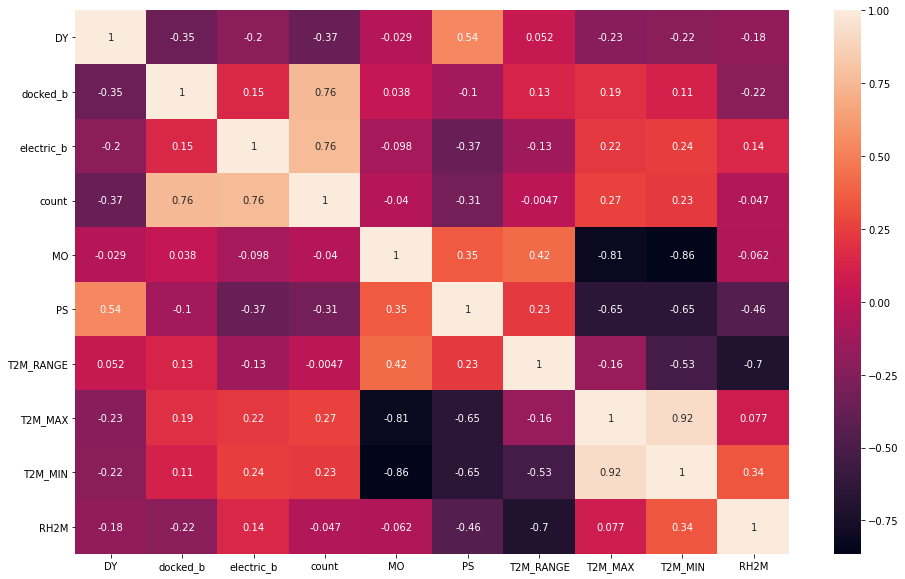

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [15]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = modified['electric_b'].sum()
print (electric_count)


423
382


In [16]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

X = np.array(modified.drop(['count','docked_b','electric_b'], 1))
y = np.array(modified['docked_b'])
svclassifier = SVC(kernel='poly', degree=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          20       1.00      0.50      0.67         2

    accuracy                           0.29         7
   macro avg       0.22      0.17      0.19         7
weighted avg       0.43      0.29      0.33         7



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(y_pred)
print(y_test)

[16 17 10 14 13 20 13]
[ 8 17 19 20 16 20  5]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


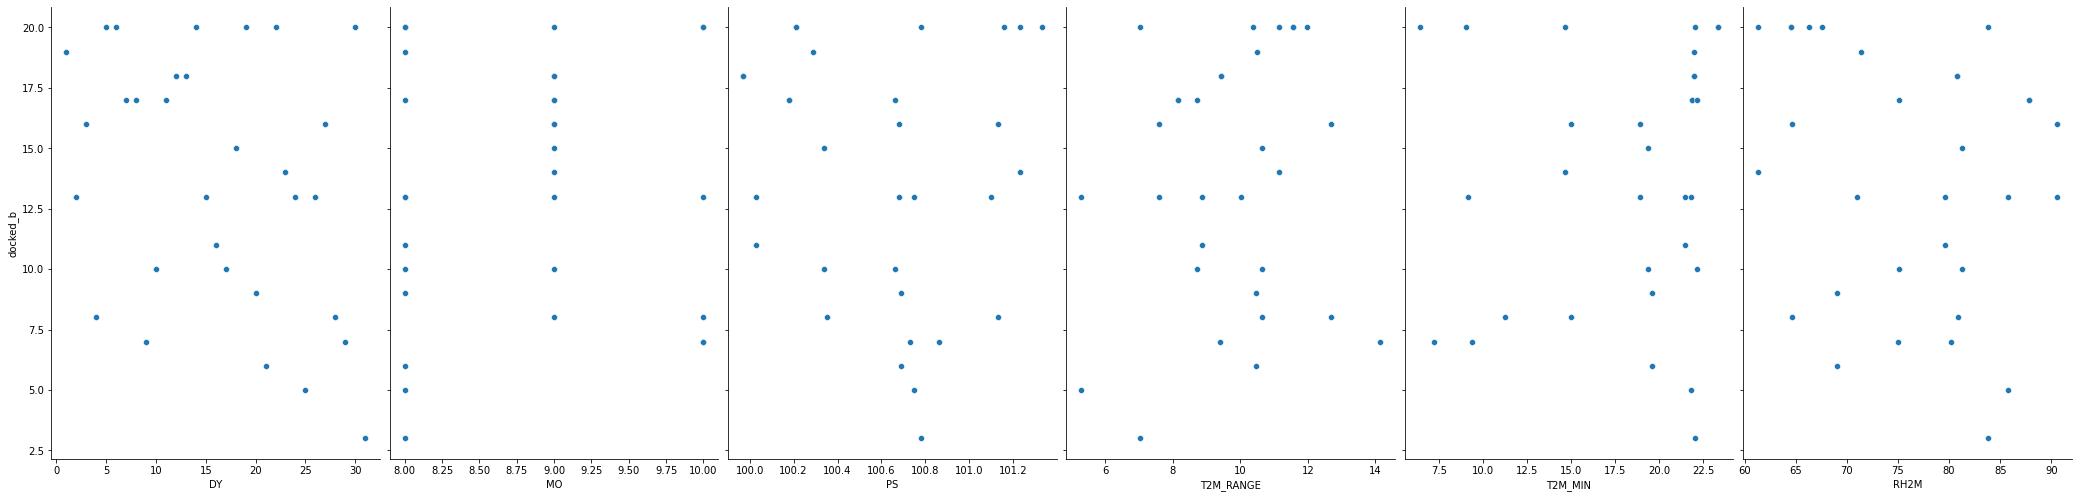

In [20]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(modified, x_vars=['DY','MO','PS','T2M_RANGE','T2M_MIN','RH2M'], y_vars='docked_b', size=7, aspect=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


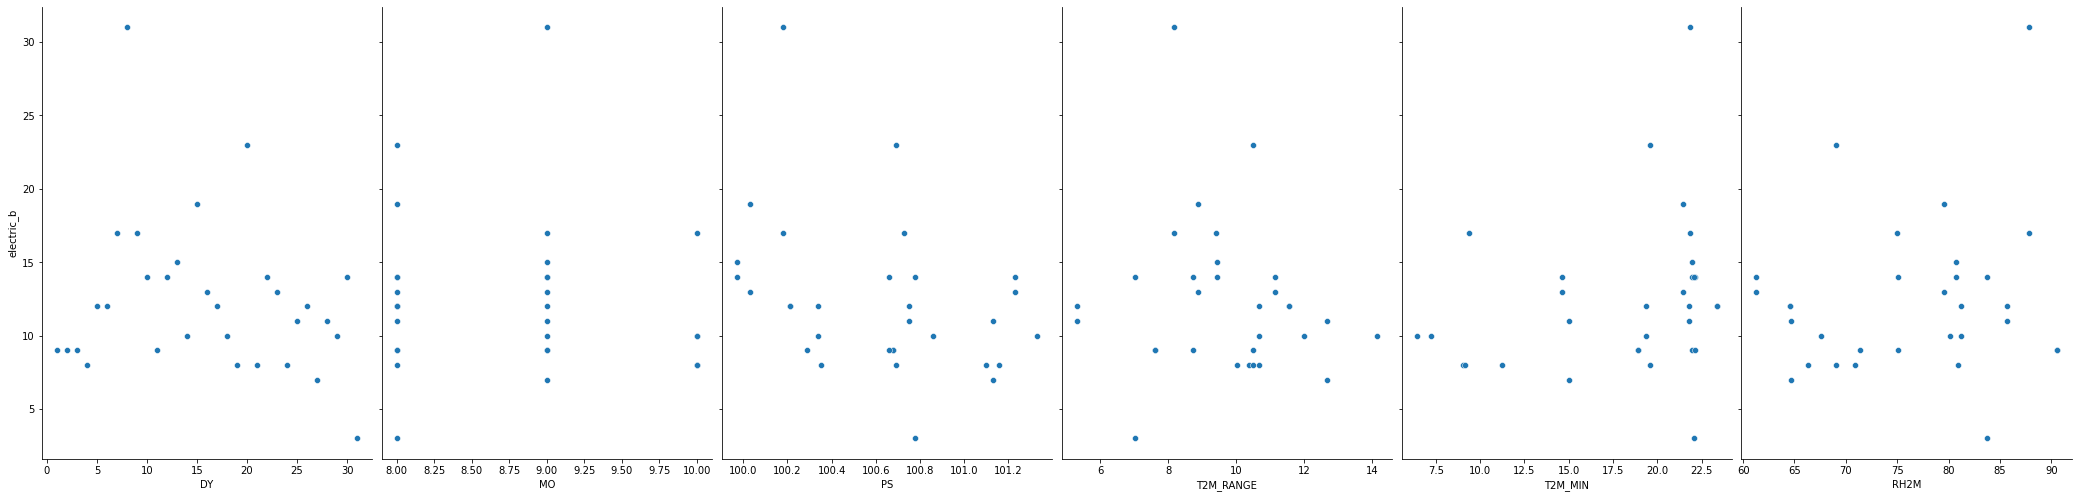

In [21]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(modified, x_vars=['DY','MO','PS','T2M_RANGE','T2M_MIN','RH2M'], y_vars='electric_b', size=7, aspect=0.7)

In [22]:

X = np.array(modified.drop(['PS','docked_b','count'], 1))
y = np.array(modified['docked_b'])

In [23]:
X = preprocessing.scale(X)

In [24]:
y = np.array(modified['docked_b'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
clf = LinearRegression()

In [27]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred


array([17.95646796, 16.53156658, 11.5236334 , 13.0390536 ,  8.24567261,
       21.21298681, 15.13478564])

In [28]:
y_test

array([14,  8, 13,  6, 13, 20, 10])

In [29]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

-0.5127792889877125


In [30]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

14.278844083888096
[-7.19732855e-01 -2.50415919e-02  5.18407591e+00 -1.18534062e+02
  2.59025290e+02 -2.95340054e+02 -3.93584950e+00]


In [31]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2


,Actual,Predicted
0,14,17.956468
1,8,16.531567
2,13,11.523633
3,6,13.039054
4,13,8.245673
5,20,21.212987
6,10,15.134786


In [32]:
y_test1 = y_test
y_pred1 = y_pred

In [33]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test1, y_pred1)
mse1

27.230027201778825

In [34]:
X = np.array(modified.drop(['PS','electric_b','count'], 1))
y = np.array(modified['electric_b'])

In [35]:
#X = preprocessing.scale(X)
y = np.array(modified['electric_b'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [36]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.01671284850363064


In [37]:
U=clf.predict(X_test)
U

array([12.91354029, 10.18750961, 10.29786695, 16.75869784, 10.86284364,
       12.77035652, 13.87591969])

In [38]:
y_test

array([ 8,  8, 10, 15, 11, 12, 12])

In [39]:
clf.score(X_test,y_test)

0.01671284850363064

In [40]:
y_test2 = y_test
y_pred2 = U

In [41]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

5.177307858899253

In [42]:
ls = []
mse_list = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','docked_b','count'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['PS','docked_b','count'], 1))
  y_test = np.array(y['docked_b'])
  clf = LinearRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  confidence = clf.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
mean_regression_d = np.mean(ls)
max_reg_d = np.max(ls)
mean_mse_reg_d = np.mean(mse_reg)
mean_regression_d

-2.0330346305819487e+23

In [43]:
ls = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','electric_b','count'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['PS','electric_b','count'], 1))
  y_test = np.array(y['electric_b'])
  clf = LinearRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  confidence = clf.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
mean_regression_e = np.mean(ls)
max_reg_e = np.max(ls)
mean_mse_reg_e = np.mean(mse_reg)
print(mean_regression_e)

-1.4155959116413407e+26


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
ls = []
for i in range(0,15):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','docked_b','count'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['PS','docked_b','count'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  confidence = regressor.score(X_test, y_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  ls.append(confidence)
  mse_list.append(mse_reg)
Random_forest_max_d = np.max(ls)
Random_forest_mean_d = np.mean(ls)
mean_mse_rand_d = np.mean(mse_reg)
Random_forest_mean_d

-0.33484114283619243

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
ls = []
for i in range(0,30):
  u = (i)%31
  v = (26+i)%31
  if v >= 26:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['PS','electric_b','count'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['PS','electric_b','count'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  confidence = regressor.score(X_test, y_test)
  ls.append(confidence)
  mse_list.append(mse_reg)
Random_forest_max_e = np.max(ls)
Random_regression_e = np.mean(ls)
mean_mse_forest_e = np.mean(mse_reg)
Random_regression_e

-1.2409966561385015

***Results -------------------//////***




In [46]:
#linear regression Electric bike
print("Actual and predicted value of Electric bike")
df1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred1.flatten()})
df1

Actual and predicted value of Electric bike


,Actual,Predicted
0,14,17.956468
1,8,16.531567
2,13,11.523633
3,6,13.039054
4,13,8.245673
5,20,21.212987
6,10,15.134786


In [47]:
#linear regression Docked bike
print("Actual and predicted value of Docked bike")
df2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
df2

Actual and predicted value of Docked bike


,Actual,Predicted
0,8,12.913540
1,8,10.187510
2,10,10.297867
3,15,16.758698
4,11,10.862844
5,12,12.770357
6,12,13.875920


In [48]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Linear Regression')
t = PrettyTable(['Bike', 'Means Square Error'])
t.add_row(['Docked', mse1])
t.add_row(['Electric', mse2])
print(t)

Accuracy of Docked and Electric (with cross validation) using Linear Regression
+----------+--------------------+
|   Bike   | Means Square Error |
+----------+--------------------+
|  Docked  | 27.230027201778825 |
| Electric | 5.177307858899253  |
+----------+--------------------+


In [49]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Linear Regression')
t = PrettyTable(['Bike','Avg. Mean Square Error','Max Accuracy', 'Accuracy'])
t.add_row(['Docked',mean_mse_reg_d,max_reg_d, mean_regression_d])
t.add_row(['Electric',mean_mse_reg_e,max_reg_e, mean_regression_e])
print(t)

Accuracy of Docked and Electric (with cross validation) using Linear Regression
+----------+------------------------+---------------------+-------------------------+
|   Bike   | Avg. Mean Square Error |     Max Accuracy    |         Accuracy        |
+----------+------------------------+---------------------+-------------------------+
|  Docked  |   52121.99740824696    | 0.17494142117616063 | -2.0330346305819487e+23 |
| Electric |   1814.2995324498825   | -0.9113150035152838 | -1.4155959116413407e+26 |
+----------+------------------------+---------------------+-------------------------+


In [50]:
from prettytable import PrettyTable
print('Accuracy of Docked and Electric (with cross validation) using Random Forest')
t = PrettyTable(['Bike','Avg. Mean Square Error','Max Accuracy', 'Mean Accuracy'])
t.add_row(['Docked',mean_mse_rand_d, Random_forest_max_d ,Random_forest_mean_d])
t.add_row(['Electric',mean_mse_forest_e, Random_forest_max_e, Random_regression_e])
print(t)

Accuracy of Docked and Electric (with cross validation) using Random Forest
+----------+------------------------+---------------------+----------------------+
|   Bike   | Avg. Mean Square Error |     Max Accuracy    |    Mean Accuracy     |
+----------+------------------------+---------------------+----------------------+
|  Docked  |   43.49185185185185    | 0.20635977337110467 | -0.33484114283619243 |
| Electric |   40.321481481481484   | 0.04194472640029512 | -1.2409966561385015  |
+----------+------------------------+---------------------+----------------------+
